# Prosper Loan Data -  Communicate Findings
## by Ayodeji Arowolo


## Investigation Overview


>The essence of the investigation into the Prosper loan data is to be able to predict borrower APR based on some provided loan information. The focus of my analysis is on Loan amount, Term, Year, Employee Status, Stated Income, Debt to Income Ratio, Occupation etc.


## Dataset Overview

> The dataset (loan_df) conatins 84,853 entries and 19 columns across the loan and borrowers information. There are numeric and qualitative data in the dataset. The prosper rating, Borrower APR, loan amount are some of the very important columns in the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('LoanData_cleaned.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The Distribution of the Loans by period (Year and Month)

> January has the highest loans taken across the dataset. From April the loans taken grow steadily till January, reaching its peak. While there is a decline in loans between **January and March**.

> Loans grew from year **2009 till 2013**, where it reached its peak. There was a decline between ***2013 and 2014***




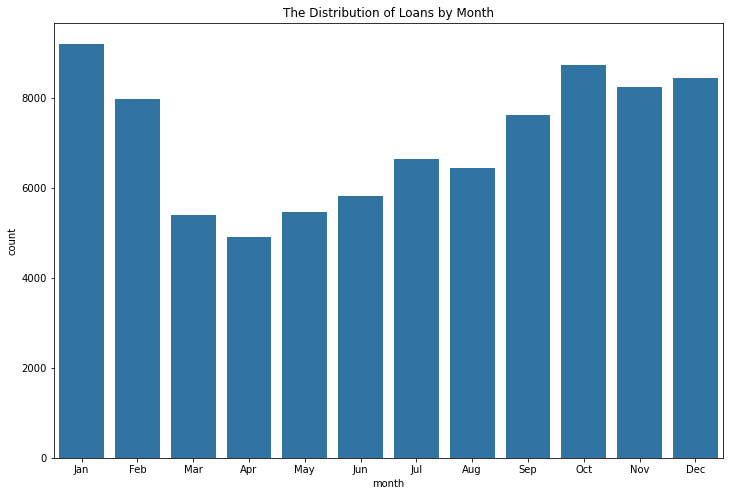

In [3]:
base_color = sb.color_palette()[0]

monthly_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_dtype = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = monthly_order)
loan_df['month'] = loan_df['month'].astype(monthly_dtype)
loan_df.groupby('month')['ListingNumber'].count()

plt.figure(figsize=[12,8])
sb.countplot(data = loan_df, x= 'month', color = base_color)
plt.title('The Distribution of Loans by Month');

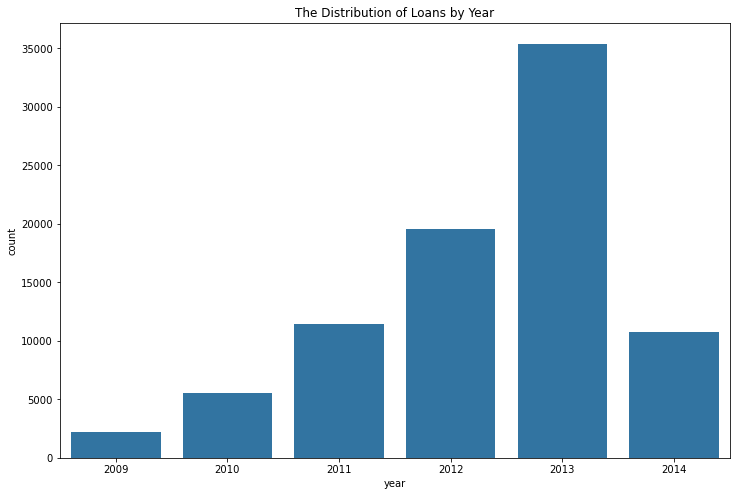

In [4]:
plt.figure(figsize=[12,8])
sb.countplot(data = loan_df, x= 'year', color = base_color)
plt.title('The Distribution of Loans by Year');

## The Distribution of the Loans by Debt To Income Ratio
Most people take loans at 0.3 debt to income ratio. This translates to applying for 33% of income as loan. This is a financial industry best practice, as rates higher than this can inconvenience the borrower and make it harder to service the loan.

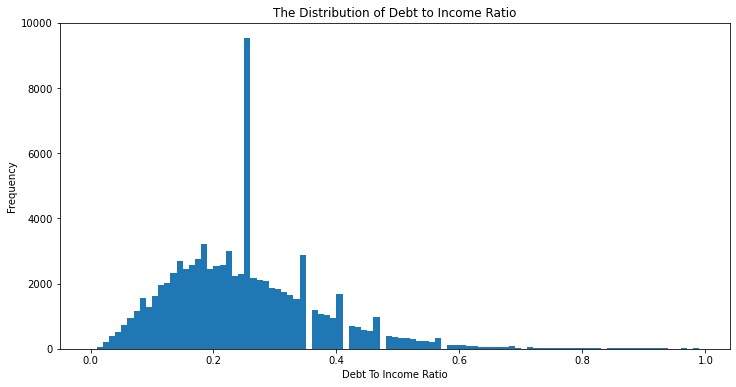

In [5]:
bin_array = np.arange(0,1, 0.01)
plt.figure(figsize=[12, 6])
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bin_array);
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Frequency')
plt.title('The Distribution of Debt to Income Ratio');

## The distribution of Borrower APR by Loan Amount 

Overall, the Borrower APR decreases with a higher loan amount.

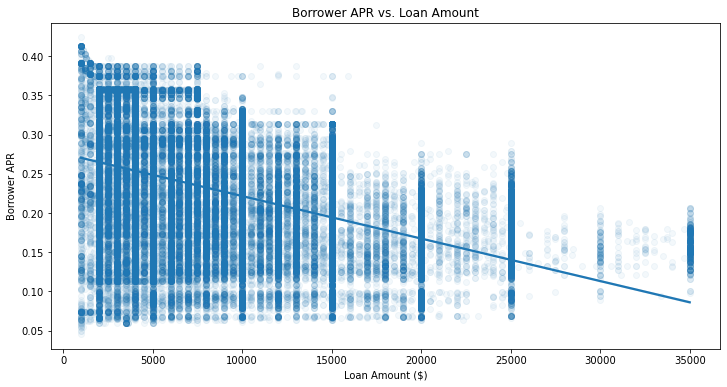

In [6]:
plt.figure(figsize = [12, 6])
sb.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/20});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

## The Distribution of year, borrower rate and being a home owner


Home owners can access loans at cheaper rates compared to non home owners. The gap between the rates applicable to home owners and non home owners reduced between 2009 and 2011. 



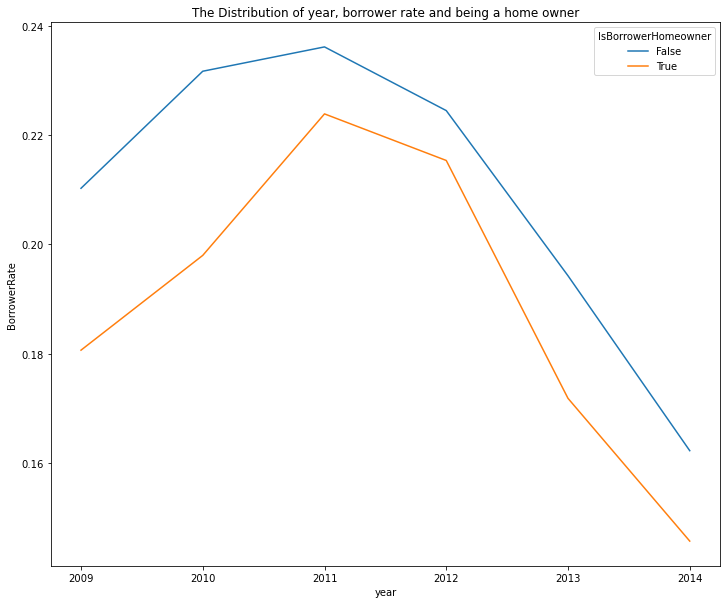

In [7]:
plt.figure(figsize=[12,10])

sb.lineplot(data=loan_df, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner',ci=None);

plt.title('The Distribution of year, borrower rate and being a home owner');

## The Distribution between Prosper Rating and Borrower Rate

Good Prosper Ratings translate to lower borrowing rates. The best rated borrowers can borrow at below 10% APR, while the borrowers with the least ratings can be charged as much as 35% APR.

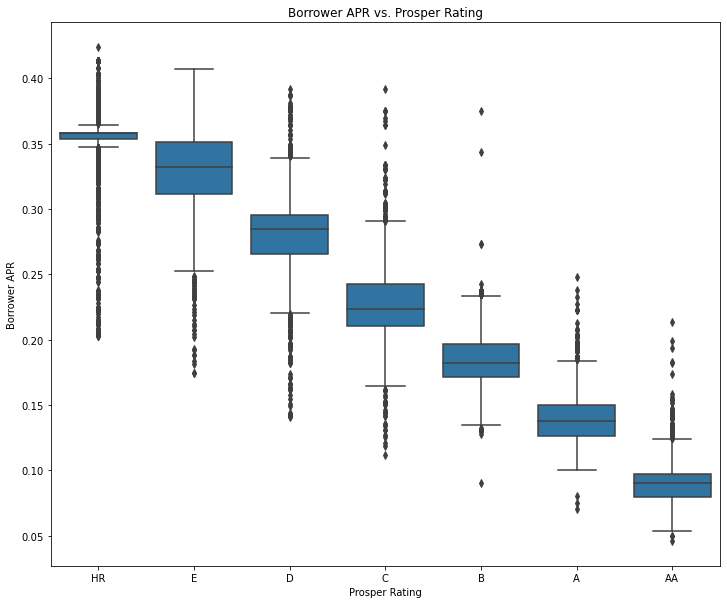

In [8]:
plt.figure(figsize=[12,10])
base_color = sb.color_palette()[0]

rating_order = ['HR','E','D','C','B','A','AA']
rating_dtype = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(rating_dtype)


sb.boxplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## The Effect of Prosper Rating on Loan amount and APR

Generally, loan amount accessible to borrowers increases with improved ratings. A working theory for most loan algorithms is that a borrower's rating improves as he or she takes loans and repays them. 
Also, borrower APR reduces with improved Prosper rating. 
Finally, the loan amount inversely varies with the APR for most prosper ratings. For the highly rated borrowers, the reverse is the case as the institution can make more profit from such borrowers.

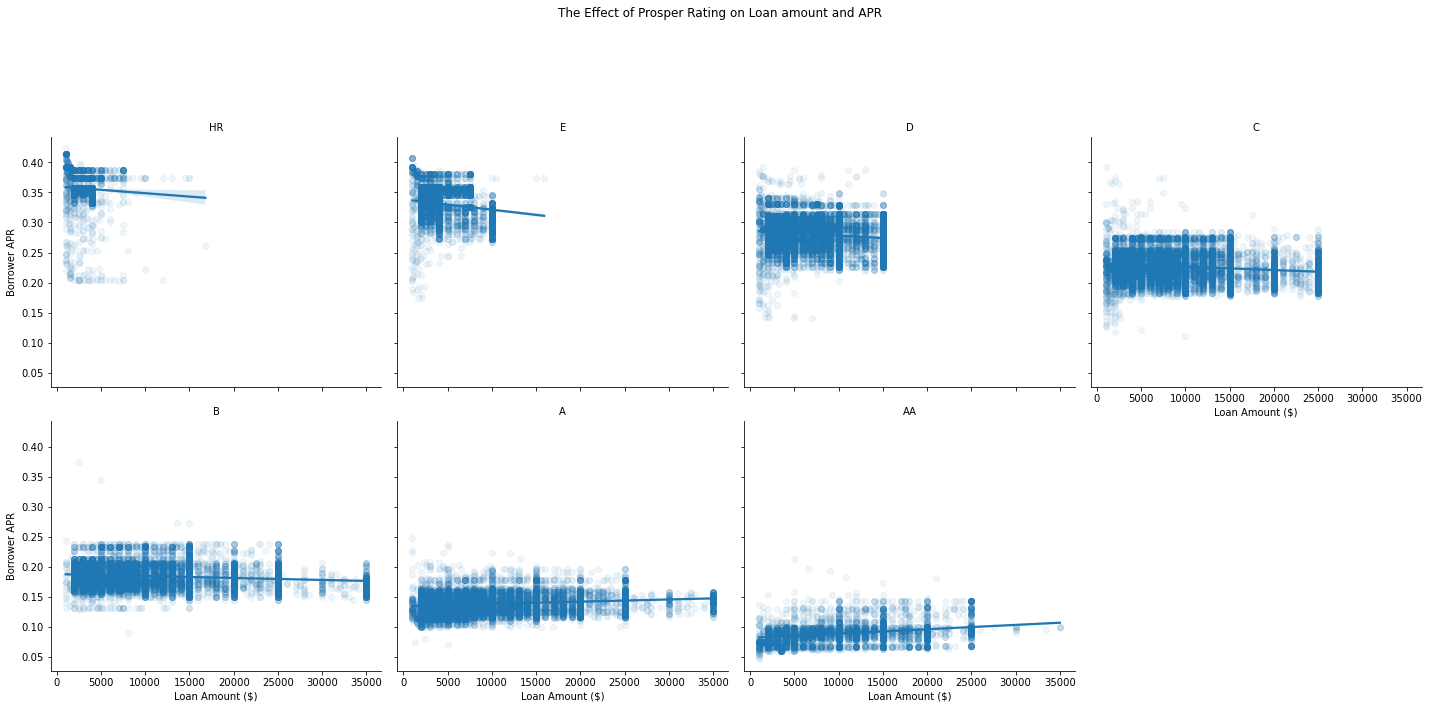

In [9]:
g=sb.FacetGrid(data=loan_df,col='ProsperRating (Alpha)', size=5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.06, scatter_kws={'alpha':1/15});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('The Effect of Prosper Rating on Loan amount and APR');
plt.subplots_adjust(top=0.80)

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Explanatory_Visualizations.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 